<a href="https://colab.research.google.com/github/bheinri2/Deep_Learning_Assessments/blob/main/Copy_of_AIT_Deep_learning_Assigment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2021 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from urllib.request import urlretrieve
import numpy as np
import random

## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [11]:
author_1_url = "https://www.gutenberg.org/cache/epub/67915/pg67915.txt"
author_2_url = "https://www.gutenberg.org/cache/epub/67912/pg67912.txt"

urlretrieve(author_1_url, 'Lawrence.txt')
urlretrieve(author_2_url, 'Farr.txt')

text1 = open("Lawrence.txt", encoding='utf-8').read().lower()
text2 = open("Farr.txt", encoding='utf-8').read().lower()

print('Number of characters in the Lawrence text:', len(text1))
print('Number of characters in the Farr text:', len(text2))
min_length = min([len(text1), len(text2)])
text1 = text1[:min_length]
text2 = text2[:min_length]

Number of characters in the Lawrence text: 55528
Number of characters in the Farr text: 110880


## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

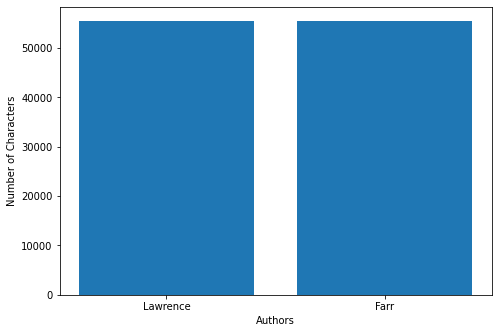

In [18]:
num_chars_1 = len(text1)
num_chars_2 = len(text2)
x = ['Lawrence', 'Farr']
y = [num_chars_1, num_chars_2]


fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.bar(x,y)
plt.xlabel('Authors')
plt.ylabel('Number of Characters')

plt.show()

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [22]:
# Load data, convert chars to one hot encoding

chars1 = sorted(list(set(text1)))
chars2 = sorted(list(set(text2)))

sequence_length = 60
chars_total = list(set(chars1 + chars2))
print(len(chars1))
print(len(chars2))
print(len(chars_total))
alphabet_length = len(chars_total)


char_indices = dict((c, i) for i, c in enumerate(chars_total))
indices_char = dict((i, c) for i, c in enumerate(chars_total))

# Load data into 3D numpy array
sentences = []
author_labels = [] # 0 for Lawrence, 1 for Farr

for i in range(0, len(text1)-sequence_length):
    sentences.append(text1[i:i + sequence_length])
    author_labels.append(0)

for i in range(0, len(text2)-sequence_length):
    sentences.append(text2[i:i + sequence_length])
    author_labels.append(1)

print(sentences[5000], author_labels[5000])
print('Number of training samples:', len(sentences))

X = np.zeros((len(sentences), sequence_length, len(chars_total)))
y = np.zeros(len(sentences))

for i, sentence in enumerate(sentences):
  for c, char in enumerate(sentence):
    X[i, c, char_indices[char]] = 1
    y[i] = author_labels[i]

print(X.shape)
print(y.shape)

60
63
68
 the desire sprang secretly in her, to go naked in the sun.  0
Number of training samples: 110936
(110936, 60, 68)
(110936,)


## Data splitting
Split the data into train, validate and test sets.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

In [26]:
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1],X.shape[2],)))
model.add(Dense(1))
model.add(Activation('sigmoid'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Model training
Train the model and apply early stopping.

In [28]:
es = EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss') # Early stopping

network_history = model.fit(x_train, y_train, batch_size=128, 
                            epochs=20, verbose=1, validation_split=0.2, 
                            callbacks=[es])

Epoch 1/20
208/208 [==============================] - 15s 70ms/step - loss: 0.2237 - val_loss: 0.2117
Epoch 2/20
208/208 [==============================] - 14s 70ms/step - loss: 0.1966 - val_loss: 0.1827
Epoch 3/20
208/208 [==============================] - 14s 69ms/step - loss: 0.1666 - val_loss: 0.1634
Epoch 4/20
208/208 [==============================] - 15s 70ms/step - loss: 0.1416 - val_loss: 0.1374
Epoch 5/20
208/208 [==============================] - 16s 75ms/step - loss: 0.1266 - val_loss: 0.1293
Epoch 6/20
208/208 [==============================] - 15s 70ms/step - loss: 0.1026 - val_loss: 0.1182
Epoch 7/20
208/208 [==============================] - 14s 70ms/step - loss: 0.0864 - val_loss: 0.1159
Epoch 8/20
208/208 [==============================] - 15s 73ms/step - loss: 0.0678 - val_loss: 0.0721
Epoch 9/20
208/208 [==============================] - 15s 70ms/step - loss: 0.0618 - val_loss: 0.0642
Epoch 10/20
208/208 [==============================] - 14s 69ms/step - loss: 0.053

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [29]:
print(model.evaluate(x_test, y_test))

2427/2427 [==============================] - 35s 14ms/step - loss: 0.0566
0.056645315140485764


## Confusion matrix
Calculate and display the confusion matrix.

[[37572  1148]
 [  405 38531]]


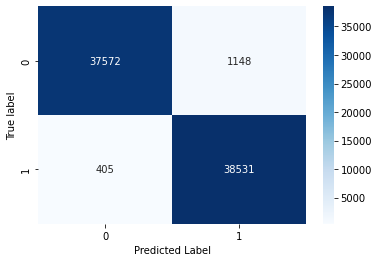

In [30]:
from sklearn.metrics import confusion_matrix

preds = model.predict(x_test)
y_pred = np.round(preds)

conf=confusion_matrix(y_test, y_pred)
print(conf)

import seaborn as sns
ax = sns.heatmap(conf, annot=True, fmt='d', cmap='Blues') 
ax.set(xlabel='Predicted Label',
       ylabel='True label');